# Logistic regression with statsmodels (binary)

ต่อมาเราจะมาสอนการเขียน code ที่ใช้ประมาณการข้อมูลโดยใช้ logistic regression ซึ่งหัวข้อที่เราจะกล่าวถึงมีดังต่อไปนี้
* 1.การดึงและตรวจสอบข้อมูล
* 2.การประมาณการข้อมูลโดยใช้ statsmodels
* 3.การตรวจสอบความแม่นยำของ model ด้วย confusion matix

## 1.การดึงและตรวจสอบข้อมูล

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* **เรียก library** พื้นฐานในการอ่านข้อมูล หากต้องการทราบการทำงานของแต่ละ library เข้าไปดูได้ที่ : https://ilog.ai/jupyter-notebook-for-data-science/

In [2]:
data = pd.read_csv ('C:\\Users\\LENOVO\\Desktop\\files for example\\buy_insurance.csv')

* **สร้าง object** ขึ้นมาตั้งชื่อว่าอะไรก็ได้ ในที่นี้เราให้ชื่อว่า data แล้วก็ใส่คำสั่ง pd.read.csv() เป็นคำสั่งอ่านไฟล์ แล้วก็ใส่ที่อยู่ของไฟล์ลงไปในวงเล็บ

In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
age,22,25,47,52,46,56,55,60,62,61,...,58,19,18,21,26,40,45,50,54,23
buy_insurance,0,0,1,0,1,1,0,1,1,1,...,1,0,0,0,0,1,1,1,1,0


* **data.T** คือสำสั่งให้แสดงข้อมูลของเราในรูป dataframe แบบ transpose

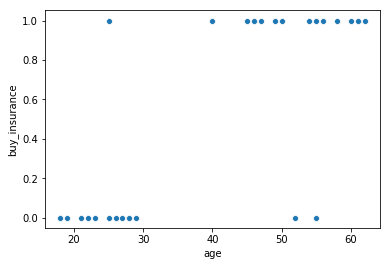

In [4]:
sns.scatterplot(data=data, x='age', y='buy_insurance')

* **sns.scatterplot** เป็นคำสั่งในการพล็อตการกระจายตัวของข้อมูล ดูรายละเอียดการใส่คำสั่งในวงเล็บได้ที่ : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age              27 non-null int64
buy_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 512.0 bytes


* **data.info()** เป็นเรียกดู characters ของข้อมูลเรา และเช็คได้ว่ามี missing value หรือไม่

## 2.การประมาณการข้อมูลโดยใช้ statsmodels

In [6]:
from patsy import dmatrices
import statsmodels.api as sm

* **from patsy import dmatrices** เรียก library patsy และ import dmatrices เพื่อที่เราจะสร้างตาราง matrices ให้กับข้อมูลของเรา รายละเอียดเพิ่มเติม : https://patsy.readthedocs.io/en/latest/API-reference.html
* **import statsmodels.api as sm** เรียกใช้ statsmodels โดยเรากำหนดตัวย่อให้มันว่า sm

In [7]:
y, X = dmatrices('buy_insurance ~ age', data=data, return_type = 'dataframe')

* **สร้าง objective 2 อัน** คือ y กับ X และใส่คำสั่งให้มันจัดข้อมูลของเรา(data)ให้อยู่ในรูปของ matrix เพื่อให้มันคำนวณหลังบ้านได้ และให้มันแสดงผลข้อมูลของเราในรูปของ dataframe

In [8]:
X.head()

,Intercept,age
0,1.0,22.0
1,1.0,25.0
2,1.0,47.0
3,1.0,52.0
4,1.0,46.0


In [9]:
y.head()

,buy_insurance
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


* **X.head() , y.head()** เป็นคำสั่งขอดูข้อมูลแค่ 5 แถวแรก

In [10]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.377894
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          buy_insurance   No. Observations:                   27
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.4543
Time:                        16:36:46   Log-Likelihood:                -10.203
converged:                       True   LL-Null:                       -18.696
                                        LLR p-value:                 3.764e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2729      1.814     -2.907      0.004      -8.828      -1.718
age            0.1357      0.044      3.118      0.002       0.050       0.221
==============================================================================
"""

 **อธิบายตาราง  Logistic Regression Result**    


* **ทำการประมาณการ** 
เริ่มจากสร้าง object ว่า model จากนั้นใส่ code สั่งให้มันคำนวณนั่นคือ sm.Logit(y, X).fit() จากนั้นสามารถเรียกดูผลของการประมาณการโดยใช้คำสั่ง model.summary() ซึ่งจะแสดงอยู่ในรูปของ Logistic Regression Result

* **Pseudo R-squ.** (Pseudo R- squared) ทำหน้าที่คล้ายๆ R-squared เหมือนการประมาณการแบบ linear regression โดยมันคือตัวบอก goodnest of fit คือค่าที่บอกว่า model นี้ ใช้อธิบายความสัมพันธ์ระหว่างตัวแปร x และตัวแปรตาม(y)ได้มากน้อยแค่ไหน ซึ่งมีค่าอยู่ระหว่าง 0<R<1 ถ้าใกล้ 0 คือดี ในที่นี้เราได้ 0.45 ถือว่ากลางๆ   

* **LLR p-value** ทำหน้าที่คล้ายกับ F-test p-value คือ หากผลออกมาว่า significant แสดงว่า **มี x อย่างน้อย 1 ตัวที่มีความสัมพันธ์กับ Y** ค่า Prob จะดูว่า significant หรือไม่ ดูได้จาก ถ้า Prob < ระดับนัยสำคัญ = significant ซึ่งในที่นี้ 0.000 < 0.05) ซึ่งในที่นี้ค่า LLR p-value มีค่าน้อยมากๆๆ ดังนั้นจึง significant ทุกระดับนัยสำคัญ   

* **z, P>l z l ,confident interval [0.025  0.975]** ซึ่งค่าทั้ง 3 นั้นจะสอดคล้องกัน โดยมันเป็นค่าที่ใช้บอกว่า ตัวแปรอิสระนั้นๆ มีความสัมพันธ์กับ Y หรือไม่(ดูเจาะลึกลงไปทีละตัวแปรเลย)ซึ่งในที่นี้เรามีการกำหนดระดับนัยสำคัญไว้ที่ 0.05 นั่นคือ หากค่าของตัวแปรใดในช่อง **P-value มีค่ามากกว่า 0.05 แสดงว่าตัวแปรนั้นไม่มีความสัมพันธ์กับตัวแปร Y อย่างมีนัยสำคัญทางสถิติ** ซึ่งเมื่อดูแล้วจะเห็นได้ว่า coefficient ของ age นั้นมีค่า p-value ที่น้อยกว่าะดับนัยสำคัญ แสดงว่า age(X) มีความสัมพันธ์กับการซื้อประกัน(y) อย่างมีนัยสำคัญ

In [11]:
model.params

Intercept   -5.272931
age          0.135722
dtype: float64

* เราสามารถใช้คำสั่ง .params เพื่อดึงเฉพาะข้อมูลที่เป็น parameters ออกมาได้

In [12]:
model.predict(X)

0     0.092201
1     0.132402
2     0.751382
3     0.856264
4     0.725174
5     0.911128
6     0.899508
7     0.946363
8     0.958585
9     0.952849
10    0.055728
11    0.186529
12    0.166805
13    0.208004
14    0.798579
15    0.899508
16    0.132402
17    0.930793
18    0.063315
19    0.055728
20    0.081453
21    0.148785
22    0.538907
23    0.697316
24    0.819529
25    0.886557
26    0.104207
dtype: float64

* ต่อมาเมื่อเราประมาณการตัว coefficient และ intercept มาแล้ว เราจะนำมันมาประมาณการข้อมูลของเรา ว่าคนในช่วงอายุต่างๆมีโอกาสที่จะซื้อประกันเท่าไร เราสามารถใช้คำสั่งด้านบนได้เลย ซึ่งค่าที่ออกมาอยู่ในรูปของ probability ถ้าค่ามากกว่าหรือเท่ากับ 0.05 แสดงว่า y = 1 หมายความว่าคนั้นเขาจะซื้อประกัน

In [13]:
model.predict(X).apply(lambda p: 0 if p < .5 else 1)

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
dtype: int64

* ต่อมาเราสามารถใช้อีกคำสั่งเพื่อให้มันแสดงออกมาเลยว่า ซื้อหรือไม่ซื้อประกัน เราสามารถเขียนสูตร(lambda p)ตามด้านล่าง คือถ้า(if) probability น้อยกว่า 0.5 ให้แสดงผล 0 และถ้ามาากว่า 0.5 ให้แสดง 1 คำสั่งที่เราใช้คือ if else


In [14]:
model.predict([[1, 39]])

array([0.5050547])

* หากเราต้องการที่จะลอง predict เอง เราสามารถใส่ตัวเลขลงไปใน[[intercept,ค่าของ x1]] จากตัวอย่าง คนที่อายุ 39 จะมีโอกาสซื้อประกัน(buy_insurance)เท่ากับ 0.5050547 ซึ่งเกิน 0.5 แสดงว่า y=1    
**เพิ่มเติม** : intercept ที่เราให้เลข 1 เพราะว่า เรากำหนดให้ X[o] = 1 

#### เปรียบเทียบ Yจริง และ Yp

In [15]:
data

,age,buy_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [16]:
data['Yp']=model.predict(X).apply(lambda p: 0 if p < .5 else 1)
data['prob']=model.predict(X)
data

,age,buy_insurance,Yp,prob
0,22,0,0,0.092201
1,25,0,0,0.132402
2,47,1,1,0.751382
3,52,0,1,0.856264
4,46,1,1,0.725174
5,56,1,1,0.911128
6,55,0,1,0.899508
7,60,1,1,0.946363
8,62,1,1,0.958585
9,61,1,1,0.952849


* **data['Yp']** คือเราต้องการสร้างคอลัมน์เพิ่มอีก 1 อันโดยเราตั้งชื่อว่า Yp(Yที่ได้จากการประมาณการ)ซึ่งข้างในคอลัมเราต้องการที่จะให้แสดงออกมาเป็นตัวเลข 0 และ 1 เราจึงใส่คำสั่ง model.predict(X).apply(lambda p: 0 if p < .5 else 1) ต่อท้าย

* **data['prob']** คือเราจะสร้างคอลัมน์เพิ่มอีก 1 อัน โดยอันนี้เราต้องการแสดงให้อยู่ในรูป  probability เราจึงใส่ model.predict(X) ต่อท้าย

### พล็อตกราฟ

ต่อมาหากเราต้องการพล็อตกราฟเราก็สามารถทำได้  เส้นสมการประมาณการของเราจะวาดขึ้นภายใต้สมการ logistic function ด้านล่างนี้

$$g(z)={\frac {1}{1+e^{-x}}}$$

In [17]:
def g_z(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

* เราสามารถเขียนสมการได้ โดยใช้ คำสั่ง def จากนั้นเราก็ตั้งชื่อสมการเราว่า g_z จากนั้นเราก็บอกว่าเราจะใส่ค่าอะไรลงในสมการบ้างลงใน() ซึ่งตามสมการเราจะใส่ค่า intercept,coef,x ที่เราประมาณการมาได้จากด้านบน
* ต่อมาตังชื่อว่า object ว่า ex จากนั้นเรียกใช้ function exponential ของ numpy และเราก็เขียนสมการ -X (intercept +X * coef) ลงในวงเล็บ
* จากนั้นให้มันคำนวณและแสดงค่าออกมา(เราก็จะเขียนสมการ g_z ในขั้นตอนนี้)

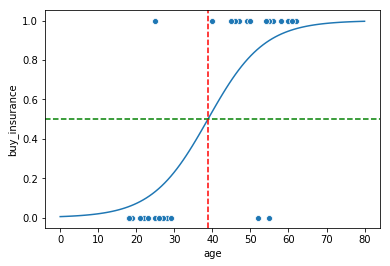

In [18]:
sns.scatterplot(data=data, x='age', y='buy_insurance') 
xp =np.linspace(0,80,100) 
yp=g_z(model.params[0], model.params[1], xp)
plt.plot(xp,yp)
plt.axhline(.5, color='green', linestyle='--')
plt.axvline(np.abs(model.params['Intercept']/model.params['age']), 
            color='red', linestyle='--')

* **sns.scatterplot** เป็นคำสั่งให้แสดงการกระจายตัวของข้อมูลเรา ซึ่งข้างในวงเล็บคือต้องบอกแหล่งที่มา, กำหนดแกน x ,กำหนดแกนy
* **สร้าง object ชื่อว่า xp** ข้างในเป็นการกำหนดขนาดของรูป โดยใช้คำสั่ง numpy.linespace(จุดเริ่มต้น,จุดสิ้นสุด,num)
* **สร้าง object ชื่อว่า yp** ข้างในเป็นเป็นสมการ logistic regression ที่เราได้เขียนไปด้านบน g_z (ข้างในคือคำสั่งเรียกค่า intercapt,coef,xp)
* **plt.plot(xp,yp)** สั่ง plot graph
* **plt.axhline** คำสั่งสร้างเส้นตรงขนานแกน x (กำหนดprob=0.5, สีของเส้น , ลักษณะของเส้น )
* **plt.axvline** คำสั่งสร้างเส้นตรงขนานแกน y (เส้นได้มาจากการคำนวณทางคณิตศาสตร์ ซึ่งมันจะคำนวณให้ตัดกับทั้ง3 เส้นพอดี และมีการกำหนดสีและลักษณะเส้นเหมือนกัน)

## 3.การตรวจสอบความแม่นยำของ model ด้วย confusion matix

**confusion matrix** จะแสดงในรูปของ matrix 2* 2 มิติ อ่านเพิ่มเติมได้ที่ https://ilog.ai/logistic-regression/

$$
\begin{bmatrix}
x_{0,0} & x_{0,1} \\
x_{1,0} & x_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
TN&FP \\
FN&TP
\end{bmatrix}
$$

* ตารางจะสลับ TN และ TP ซึ่งขึ้นอยู่กับ algorithm ที่เราใช้

In [19]:
data

,age,buy_insurance,Yp,prob
0,22,0,0,0.092201
1,25,0,0,0.132402
2,47,1,1,0.751382
3,52,0,1,0.856264
4,46,1,1,0.725174
5,56,1,1,0.911128
6,55,0,1,0.899508
7,60,1,1,0.946363
8,62,1,1,0.958585
9,61,1,1,0.952849


In [20]:
model.pred_table()

array([[11.,  2.],
       [ 1., 13.]])

* **model.pred_table()** คำสั่งแสดงการประมาณการของเราออกมา ในที่นี้จะได้ว่า
    * **TN** เดาถูกว่าเป็น positive class (y=1) ได้ 11 ค่า
    * **FP** เดาผิด คือมันเป็น negative (y=0) แต่ไปเดาว่าเป็น positive (y=1) หมายความว่า มันมีคนอายุเยอะ 2 คนที่ไม่ได้ซื้อประกัน
    * **FN** เดาผิด คือมันเป็น positive (y=1) แต่ไปเดาว่ามันเป็น negative (y=0) หมายความว่า มีคนที่อายุน้อยซื้อประกัน 1 คน
    * **TP** เดาถูกว่าเป็น negative(y=0) ได้ 13 ค่า

In [21]:
TN, FP, FN, TP = model.pred_table().ravel()
TP

13.0

* สร้าง object ออกมา 4 อัน และใส่คำสั่ง .ravel() เพื่อให้มันแสดงค่าออกมาเป็น 1 มิติ  เพื่อที่เราจะเอาไปเข้าสูตรในการคำนวณหาความแม่นยำต่อไป

$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

 **Acurracy** เราเดาถูกมากน้อยแค่ไหน 

In [22]:
Acurracy=(TP+TN)/(TP+TN+FP+FN)
Acurracy

0.8888888888888888

 $$\mathrm {Precision}={\frac {\mathrm {TP}  }{\mathrm {TP} +\mathrm {FP} }}$$

**Precision** เราเดาว่าเป็น positive ได้มากแค่ไหน จากการเดาว่าเป็น positive ทั้งหมด

In [23]:
Precision =(TP)/(TP+FP)
Precision

0.8666666666666667

 $$\mathrm {Recall}={\frac {\mathrm {TP}  }{\mathrm {TP} +\mathrm {FN} }}$$

**Recall** เราเดาว่าเป็น positive ได้มากแค่ไหน จาก ค่า Yจริงที่เป็น positive ทั้งหมด

In [24]:
Recall = (TP)/(TP+FN)
Recall

0.9285714285714286

$$\mathrm {F-measure}={\frac {\mathrm {2 * Recall * Precision}  }{\mathrm {Recall+Precision}  }}$$

**F_measure** เป็นการวัดความแม่นยำของข้อมูลทั้งหมด ได้มาจากการเฉลี่ยค่า recall และ precision 

In [25]:
F_measure = 2 * ( Recall*Precision) / (Recall+Precision)
F_measure

0.896551724137931